In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from pandas_datareader import data as pdr
from keras.models import Sequential
from datetime import datetime

In [ ]:
yf.pdr_override()

tech_list = ['AAPL', 'GOOG', 'TSLA', ]

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, TSLA]
company_name = ["APPLE", "GOOGLE", "TESLA"]

company_list = [AAPL, GOOG, TSLA]
company_name = ["APPLE", "GOOGLE", "TESLA"]

for company, com_name in zip(company_list, company_name):
    if 'company_name' not in company.columns:
        company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-11-17,151.000000,155.000000,150.990005,153.490005,151.756088,88807000,APPLE
2021-11-18,153.710007,158.669998,153.050003,157.869995,156.086594,137827700,APPLE
2021-11-19,157.649994,161.020004,156.529999,160.550003,158.736313,117305600,APPLE
2021-11-22,161.679993,165.699997,161.000000,161.020004,159.201019,117467900,APPLE
2021-11-23,161.119995,161.800003,159.059998,161.410004,159.586609,96041900,APPLE
2021-11-24,160.750000,162.139999,159.639999,161.940002,160.110626,69463600,APPLE
2021-11-26,159.570007,160.449997,156.360001,156.809998,155.038574,76959800,APPLE
2021-11-29,159.369995,161.190002,158.789993,160.240005,158.429825,88748200,APPLE
2021-11-30,159.990005,165.520004,159.919998,165.300003,163.432678,174048100,APPLE


In [ ]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,117.965524,119.509624,116.564097,118.023307,118.023307,2.704397e+07
std,17.235791,17.197740,17.073365,17.114700,17.114700,1.070772e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,102.924999,104.459999,102.034000,103.739998,103.739998,2.028425e+07
50%,117.839996,119.500000,116.626999,118.220001,118.220001,2.436510e+07
75%,132.406746,134.070007,130.860001,132.677750,132.677750,3.099660e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,9.779860e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2021-11-17 to 2023-11-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1509 non-null   float64
 1   High          1509 non-null   float64
 2   Low           1509 non-null   float64
 3   Close         1509 non-null   float64
 4   Adj Close     1509 non-null   float64
 5   Volume        1509 non-null   int64  
 6   company_name  1509 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 94.3+ KB


## Ananlysis and Visualizastion

### Closing Price

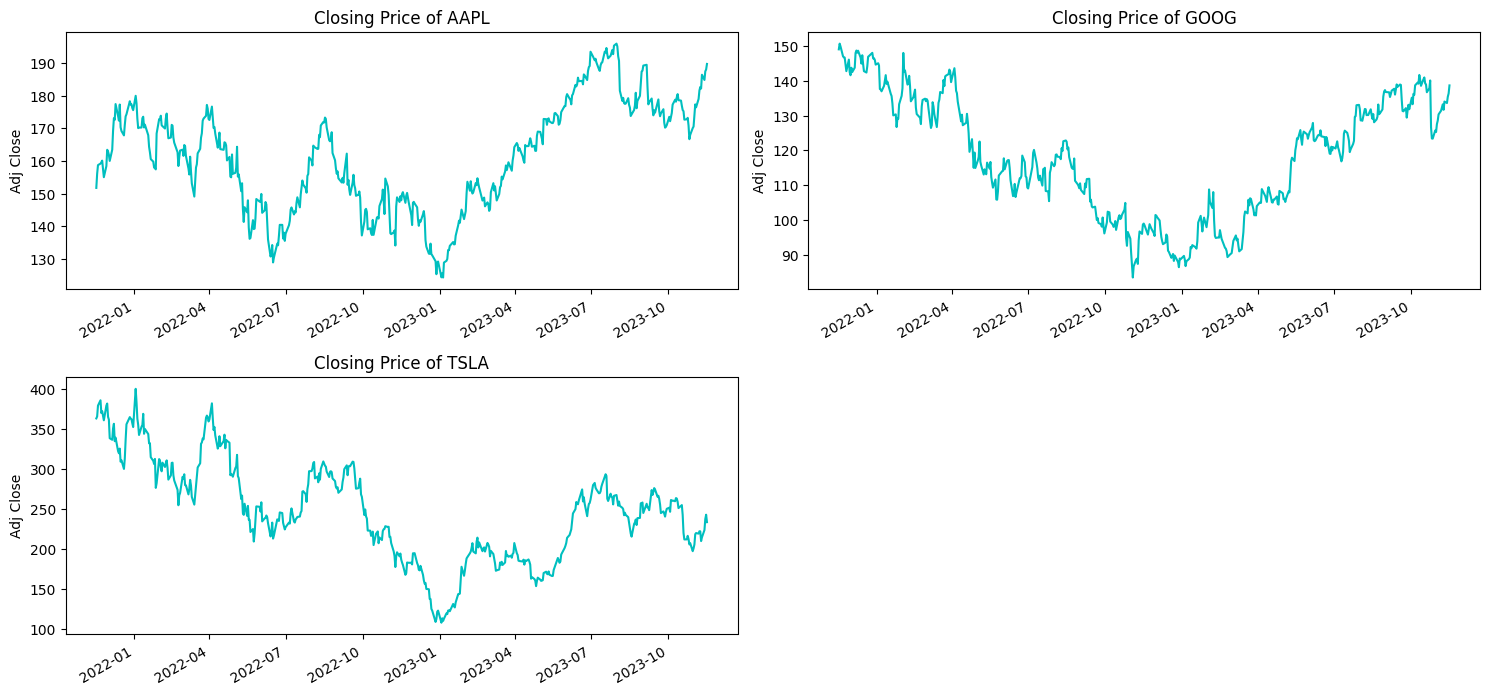

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot(color="c")
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

### Volume of Sales

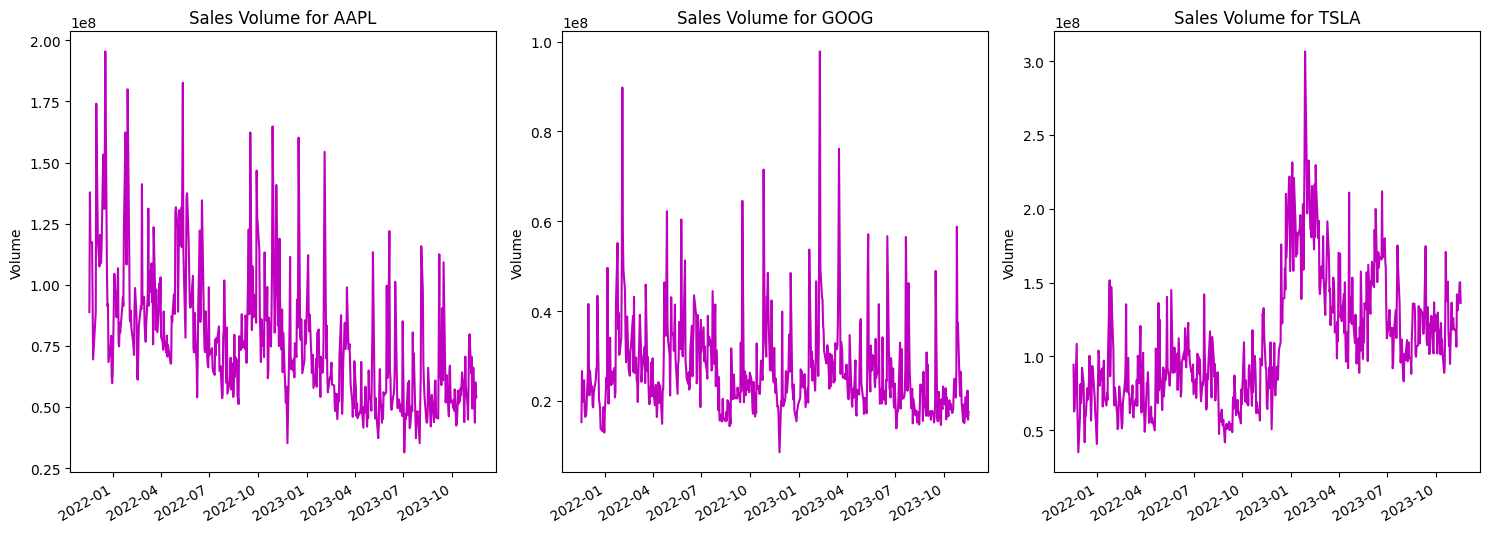

In [ ]:
plt.figure(figsize=(15,10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot(color='m')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

### Moving Average


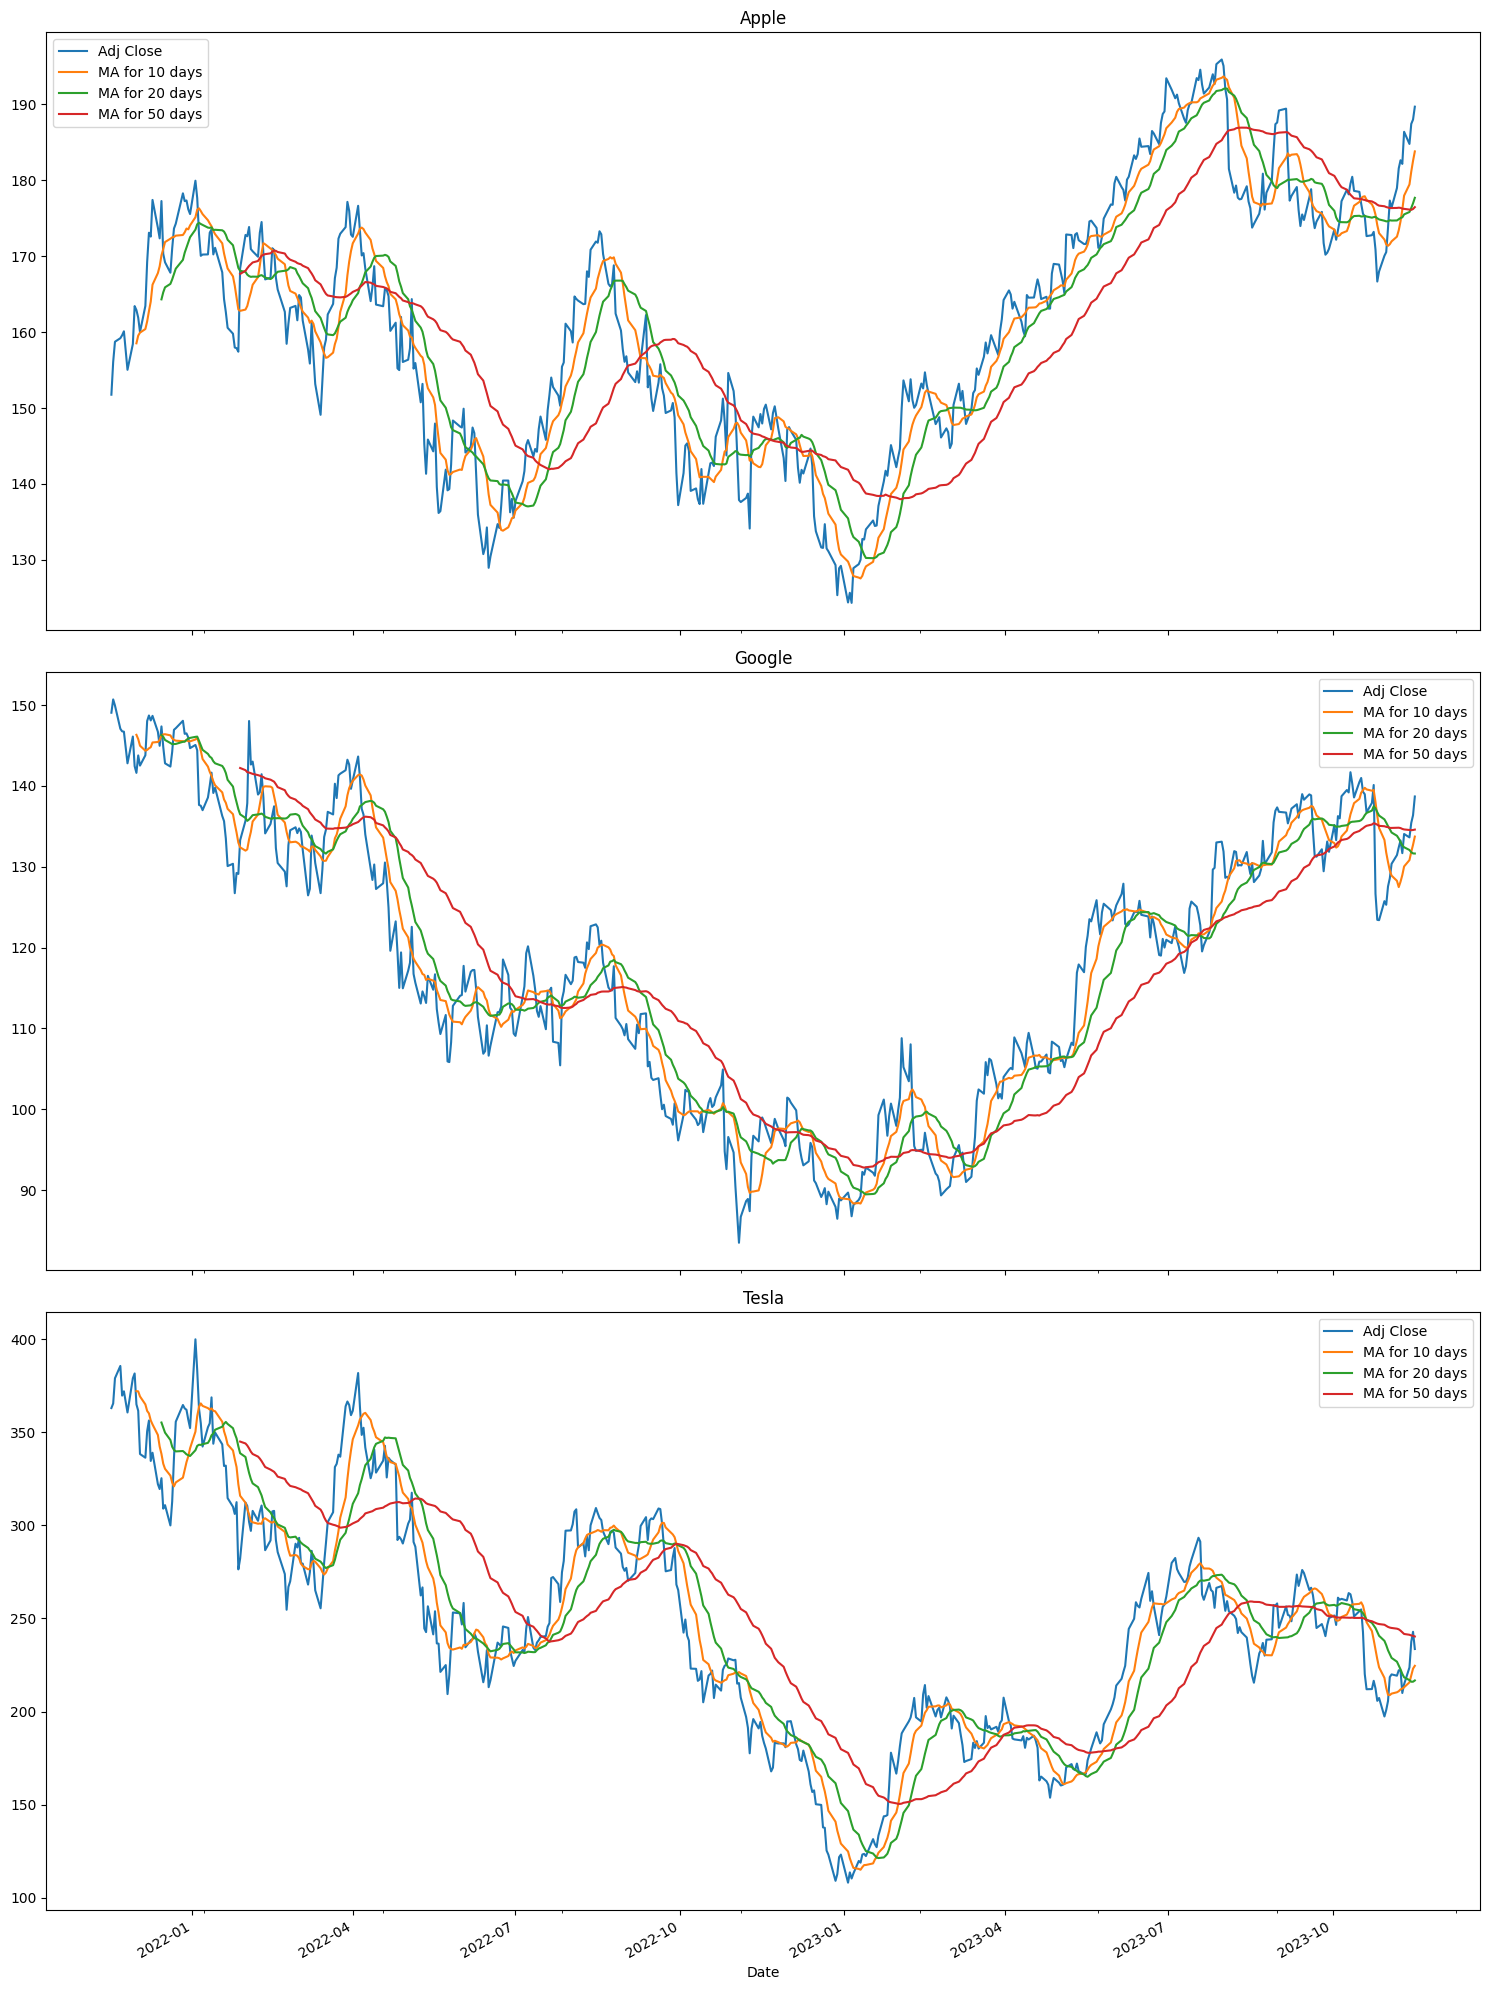

In [ ]:
mov_day = [10, 20, 50]

import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 25), sharex=True)
fig.set_figheight(20)
fig.set_figwidth(15)

for ma in mov_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

for i, (company, title) in enumerate(zip(company_list, ['Apple', 'Google', 'Tesla'])):
    company[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i])
    axes[i].set_title(title)

plt.tight_layout()
plt.show()


### Daily Returns

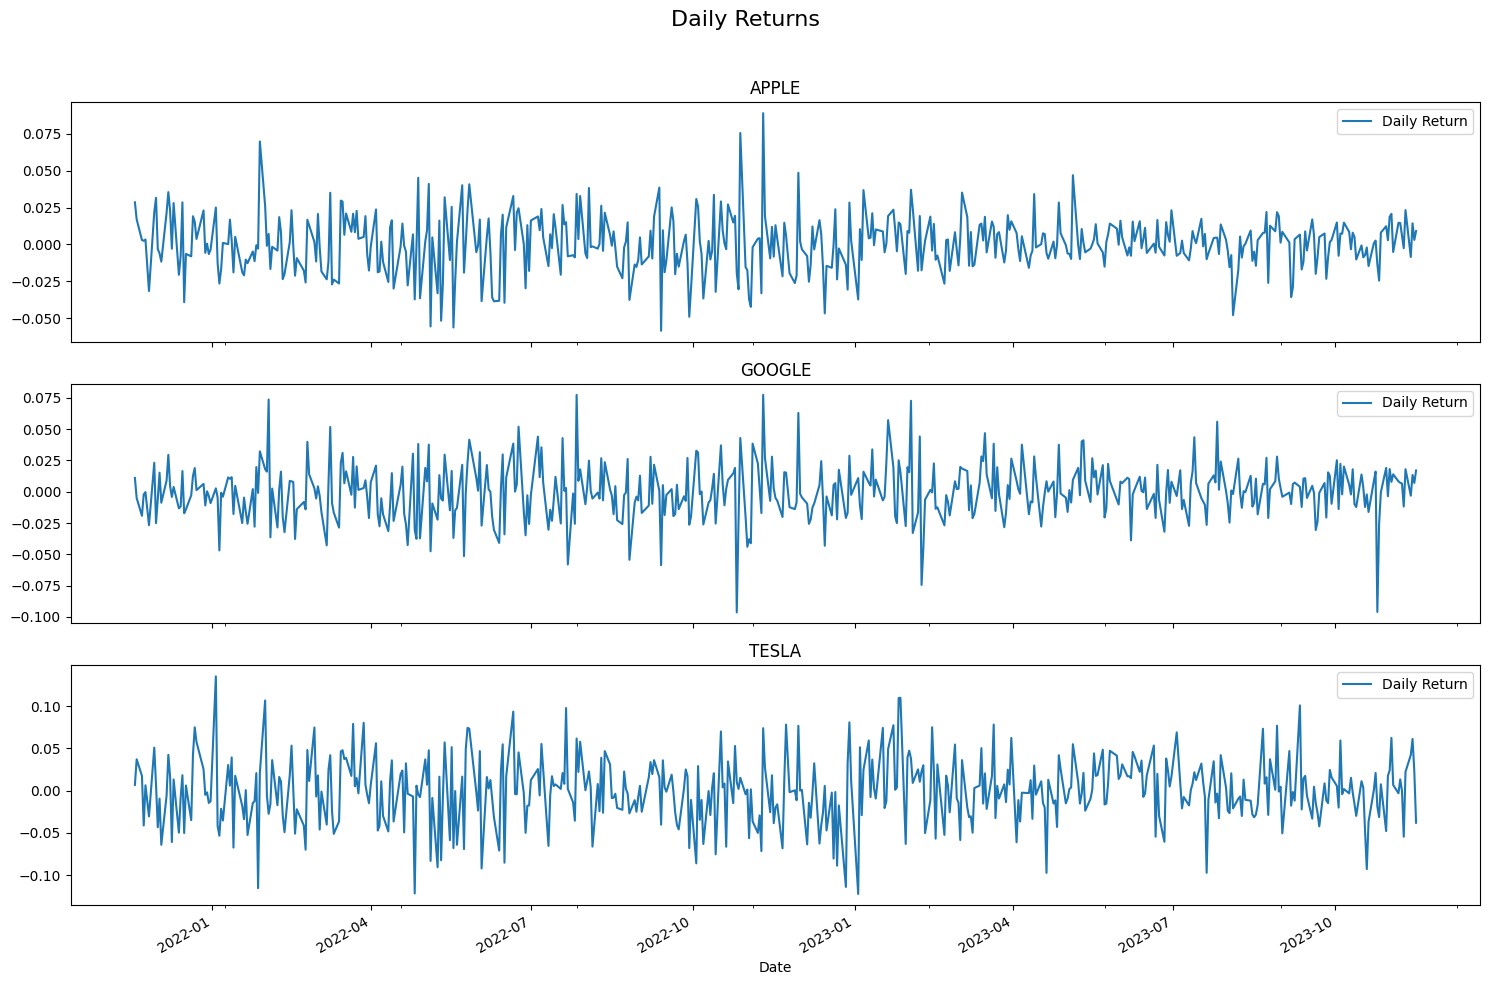

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=len(company_list), ncols=1, figsize=(15, 10), sharex=True)
fig.suptitle('Daily Returns', fontsize=16)

for i, company in enumerate(company_list):
    company[['Daily Return']].plot(ax=axes[i], label=company['company_name'].iloc[0])
    axes[i].set_title(company['company_name'].iloc[0])
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

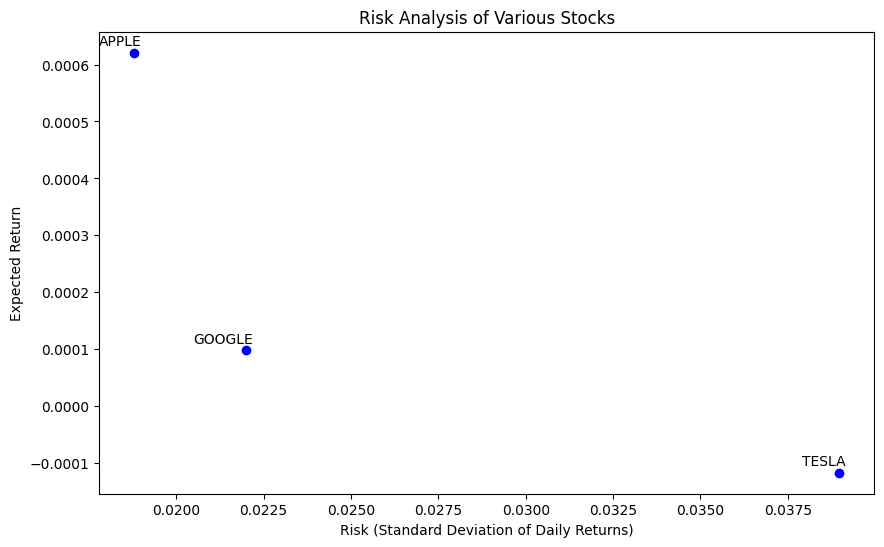

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

risk_data = pd.DataFrame(index=[company['company_name'].iloc[0] for company in company_list])
risk_data['Expected Return'] = [company['Daily Return'].mean() for company in company_list]
risk_data['Risk'] = [company['Daily Return'].std() for company in company_list]

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(risk_data['Risk'], risk_data['Expected Return'], c='blue', marker='o')
ax.set_title('Risk Analysis of Various Stocks')
ax.set_xlabel('Risk (Standard Deviation of Daily Returns)')
ax.set_ylabel('Expected Return')

for company, risk, ret in zip(risk_data.index, risk_data['Risk'], risk_data['Expected Return']):
    ax.annotate(company, (risk, ret), textcoords="offset points", xytext=(5,5), ha='right')

plt.show()

## Predicting with LSTM

In [ ]:
df_AP = pdr.get_data_yahoo(['AAPL'], start='2012-01-01', end=datetime.now())
df_TSL = pdr.get_data_yahoo(['TSLA'], start='2012-01-01', end=datetime.now())
df_NAS = pdr.get_data_yahoo(['GOOG'], start='2012-01-01', end=datetime.now())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_AP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2989 entries, 2012-01-03 to 2023-11-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2989 non-null   float64
 1   High       2989 non-null   float64
 2   Low        2989 non-null   float64
 3   Close      2989 non-null   float64
 4   Adj Close  2989 non-null   float64
 5   Volume     2989 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 163.5 KB


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


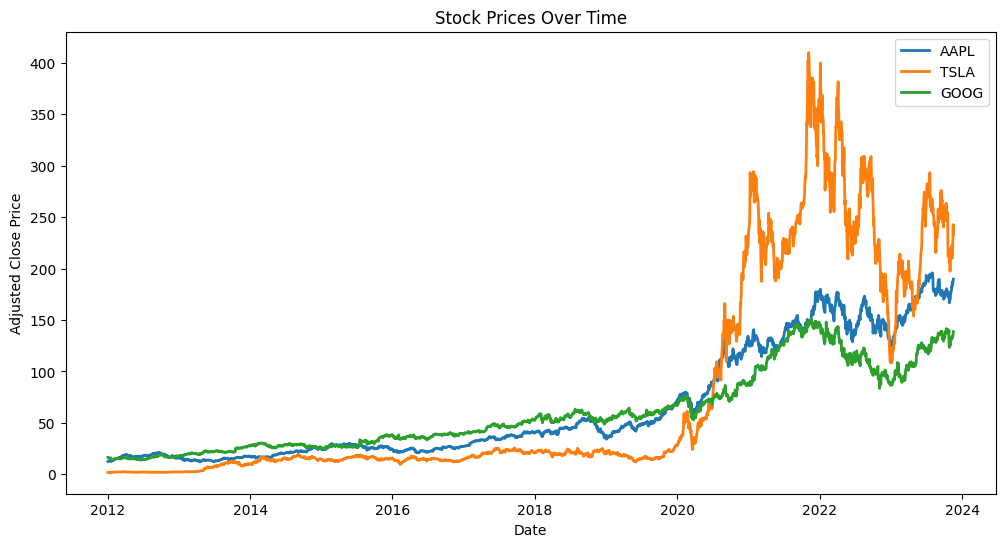

In [ ]:
symbols = ['AAPL', 'TSLA', 'GOOG']
start_date = '2012-01-01'
end_date = datetime.now()

df_AAPL = pdr.get_data_yahoo(['AAPL'], start=start_date, end=end_date)['Adj Close']
df_TSLA = pdr.get_data_yahoo(['TSLA'], start=start_date, end=end_date)['Adj Close']
df_GOOG = pdr.get_data_yahoo(['GOOG'], start=start_date, end=end_date)['Adj Close']

plt.figure(figsize=(12, 6))
plt.plot(df_AAPL.index, df_AAPL, label='AAPL', linewidth=2)
plt.plot(df_TSLA.index, df_TSLA, label='TSLA', linewidth=2)
plt.plot(df_GOOG.index, df_GOOG, label='GOOG', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Stock Prices Over Time')
plt.legend()

plt.show()

In [ ]:
# train test split based on year
training_set = df_AP[:'2020'].iloc[:,1:2].values
test_set = df_AP['2021':].iloc[:,1:2].values

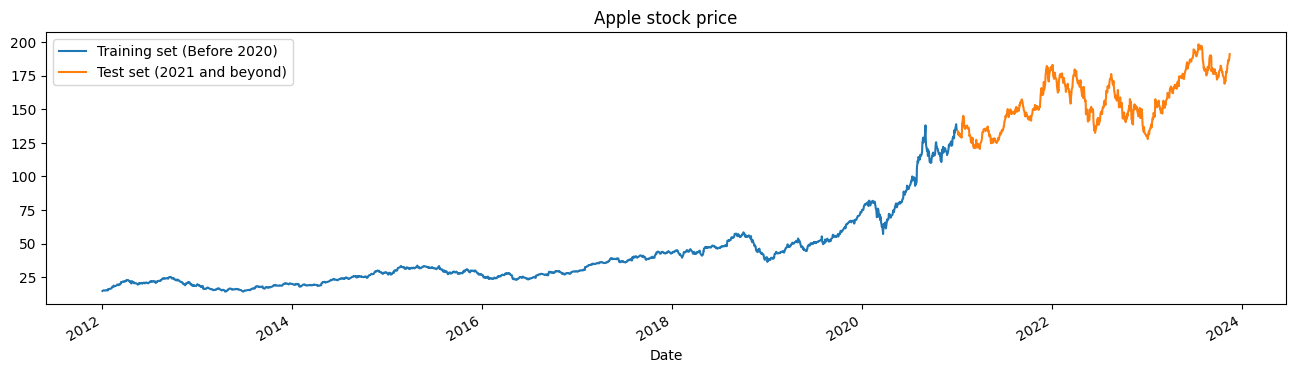

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
df_AP["High"][:'2020'].plot(figsize=(16,4),legend=True)
df_AP["High"]['2021':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2020)','Test set (2021 and beyond)'])
plt.title('Apple stock price')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

In [ ]:
def window_transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    for i in range(len(series)-window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])


    # reshape each
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)

    return X,y

In [ ]:
window_size = 7
X_train,y_train = window_transform_series(series=training_set_scaled, window_size=window_size)
X_test,y_test = window_transform_series(series=test_set_scaled, window_size=window_size)

In [ ]:
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout


# The LSTM architecture
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(window_size,1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50))
model2.add(Dropout(0.2))
# The output layer
model2.add(Dense(units=1))

# Compiling the RNN
model2.compile(loss='mean_squared_error')

# Fitting to the training set
model2.fit(X_train,y_train,epochs=50,batch_size=32, verbose=2)

Epoch 1/50
71/71 - 5s - loss: 0.0077 - 5s/epoch - 69ms/step
Epoch 2/50
71/71 - 1s - loss: 0.0012 - 986ms/epoch - 14ms/step
Epoch 3/50
71/71 - 1s - loss: 0.0011 - 1s/epoch - 14ms/step
Epoch 4/50
71/71 - 1s - loss: 0.0010 - 984ms/epoch - 14ms/step
Epoch 5/50
71/71 - 1s - loss: 9.6108e-04 - 758ms/epoch - 11ms/step
Epoch 6/50
71/71 - 1s - loss: 9.2115e-04 - 667ms/epoch - 9ms/step
Epoch 7/50
71/71 - 1s - loss: 9.4632e-04 - 685ms/epoch - 10ms/step
Epoch 8/50
71/71 - 1s - loss: 8.3192e-04 - 684ms/epoch - 10ms/step
Epoch 9/50
71/71 - 1s - loss: 8.8381e-04 - 672ms/epoch - 9ms/step
Epoch 10/50
71/71 - 1s - loss: 7.9846e-04 - 683ms/epoch - 10ms/step
Epoch 11/50
71/71 - 1s - loss: 8.6272e-04 - 680ms/epoch - 10ms/step
Epoch 12/50
71/71 - 1s - loss: 7.7340e-04 - 666ms/epoch - 9ms/step
Epoch 13/50
71/71 - 1s - loss: 7.5159e-04 - 665ms/epoch - 9ms/step
Epoch 14/50
71/71 - 1s - loss: 7.2046e-04 - 653ms/epoch - 9ms/step
Epoch 15/50
71/71 - 1s - loss: 7.5991e-04 - 671ms/epoch - 9ms/step
Epoch 16/50
71/71

In [25]:
# generate predictions for training
train_predict = model2.predict(X_train)
test_predict = model2.predict(X_test)

# print out training and testing errors
training_error = model2.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model2.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

23/23 [==============================] - 0s 7ms/step
training error = 0.0004482213989831507
testing error = 0.0036924504674971104


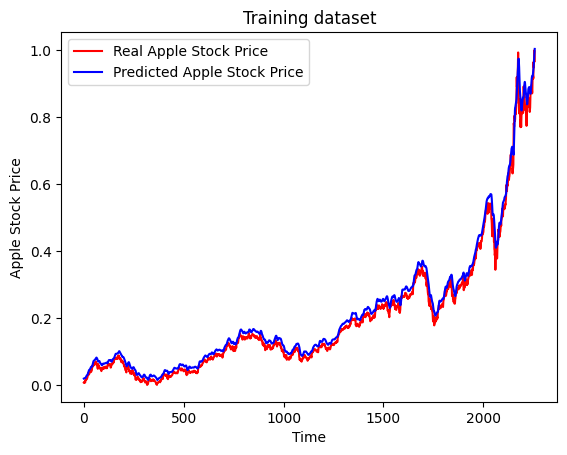

In [26]:
plt.plot(y_train, color='red',label='Real Apple Stock Price')
plt.plot(train_predict, color='blue',label='Predicted Apple Stock Price')
plt.title('Training dataset')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

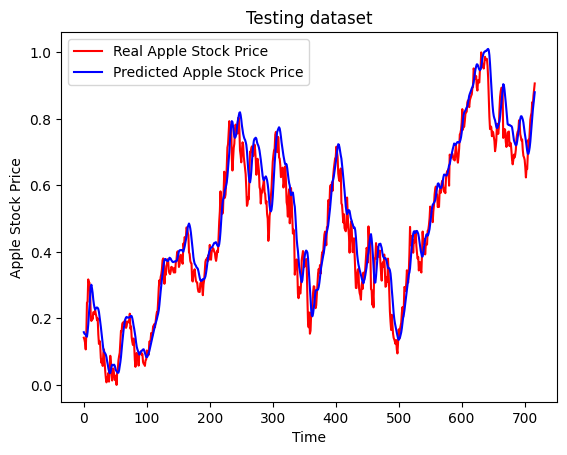

In [27]:
plt.plot(y_test, color='red',label='Real Apple Stock Price')
plt.plot(test_predict, color='blue',label='Predicted Apple Stock Price')
plt.title('Testing dataset')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()